In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
df = sns.load_dataset("tips")

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [5]:
from statsmodels.formula.api import ols

model = ols('tip ~ total_bill', data=df).fit()
predictions = model.predict(df.total_bill)

# 3. Plot the residuals for the linear regression model that you made

In [14]:
df['baseline_tip'] = df.tip.mean()

df['yhat'] = predictions

In [15]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline_tip,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


In [16]:
# compute residuals
df['residual'] = df['yhat'] - df['tip']
df['residual_baseline'] = df['baseline_tip'] - df['tip']

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline_tip,yhat,residual,residual_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,-0.611721


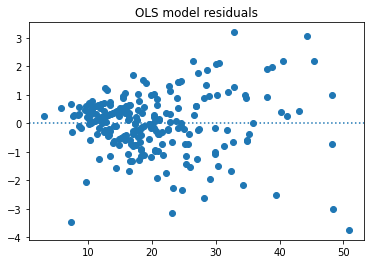

In [21]:
plt.scatter(df.total_bill, df.residual)
plt.axhline(y = 0, ls = ':')
plt.title('OLS model residuals');

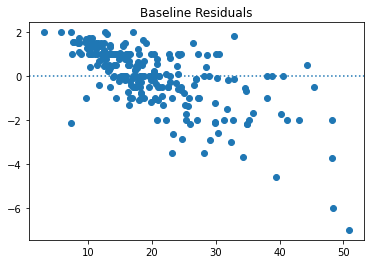

In [22]:
plt.scatter(df.total_bill, df.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.title('Baseline Residuals');

# 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

## SSE 

In [23]:
# square each residual value
df['residual^2'] = df.residual ** 2

df['residual_baseline^2'] = df.residual_baseline ** 2

df.head(3)

,total_bill,tip,sex,smoker,day,time,size,baseline_tip,yhat,residual,residual_baseline,residual^2,residual_baseline^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,1.988279,2.871792,3.953252
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,1.338279,0.119870,1.790990
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,-0.501721,0.139252,0.251724


In [27]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


## ESS

In [28]:
# compute explained sum of squares
ESS = sum((df.yhat - df.tip.mean())**2)
ESS_baseline = sum((df.baseline_tip - df.tip.mean())**2)


print("ESS = ", ESS)
print("ESS - baseline = ", ESS_baseline)

ESS =  212.4237331984042
ESS - baseline =  0.0


## TSS

In [29]:
TSS = ESS + SSE
TSS_basline = ESS_baseline + SSE_baseline

print("TSS = ", TSS)
print("TSS - baseline = ", TSS_basline)

TSS =  465.21247704918017
TSS - baseline =  465.21247704918085


## MSE

In [30]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.0360194420113769
MSE baseline =  1.9066085124966428


## RMSE

In [31]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


# 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [32]:
print("SSE - baseline = ", SSE_baseline)

print("ESS - baseline = ", ESS_baseline)

print("TSS - baseline = ", TSS_basline)

print("MSE baseline = ", MSE_baseline)

print("RMSE baseline = ", RMSE_baseline)

SSE - baseline =  465.21247704918085
ESS - baseline =  0.0
TSS - baseline =  465.21247704918085
MSE baseline =  1.9066085124966428
RMSE baseline =  1.3807999538298958


# 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [33]:
# SSE
SSE = sum(df['residual^2'])
SSE_baseline = sum(df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


In [34]:
print('SSE of the model is less than the SSE of the baseline:', SSE < SSE_baseline)

SSE of the model is less than the SSE of the baseline: True


# 7. What is the amount of variance explained in your model?

In [35]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.457
Percent of variance in y explained by x =  45.7 %


# 8. Is your model significantly better than the baseline model?

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        16:05:49   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9. Create a file named evaluate.py that contains the following functions.

## plot_residuals(y, yhat): creates a residual plot

## regression_errors(y, yhat): returns the following values:
    ### sum of squared errors (SSE)

    ### explained sum of squares (ESS)

    ### total sum of squares (TSS)

    ### mean squared error (MSE)

    ### root mean squared error (RMSE)

## baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

## better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

## model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [37]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [38]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

In [39]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

def model_significance(ols_model):
    return {
        'r^2 -- variance explained': ols_model.rsquared,
        'p-value -- P(data|model == baseline)': ols_model.f_pvalue,
    }

# 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [41]:
from pydataset import data

In [42]:
mpg = data('mpg')


In [43]:
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


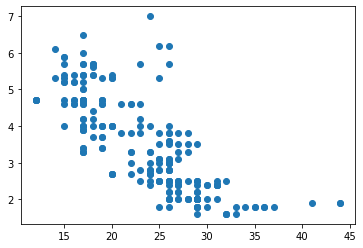

In [44]:
plt.scatter(mpg.hwy, mpg.displ)

In [45]:
model1 = ols('hwy ~ displ', data=mpg).fit()  
predictions = model1.predict(mpg.displ)

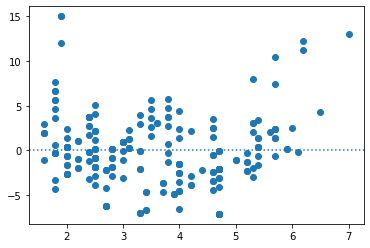

In [46]:
plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

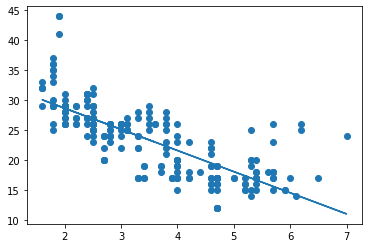

In [47]:
plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)